## This notebook does not actually do the mass change calibration; it only plots the GSFC mascons that were used in the mass calibration.

### This is because the mass change calibration was already done by Isabel Nias.


In [1]:
import sys

import numpy as np

sys.path.append('../utilities')
import GrIS_committedSLR_calibration_utilities as utils
import mascons

from matplotlib import pyplot as plt


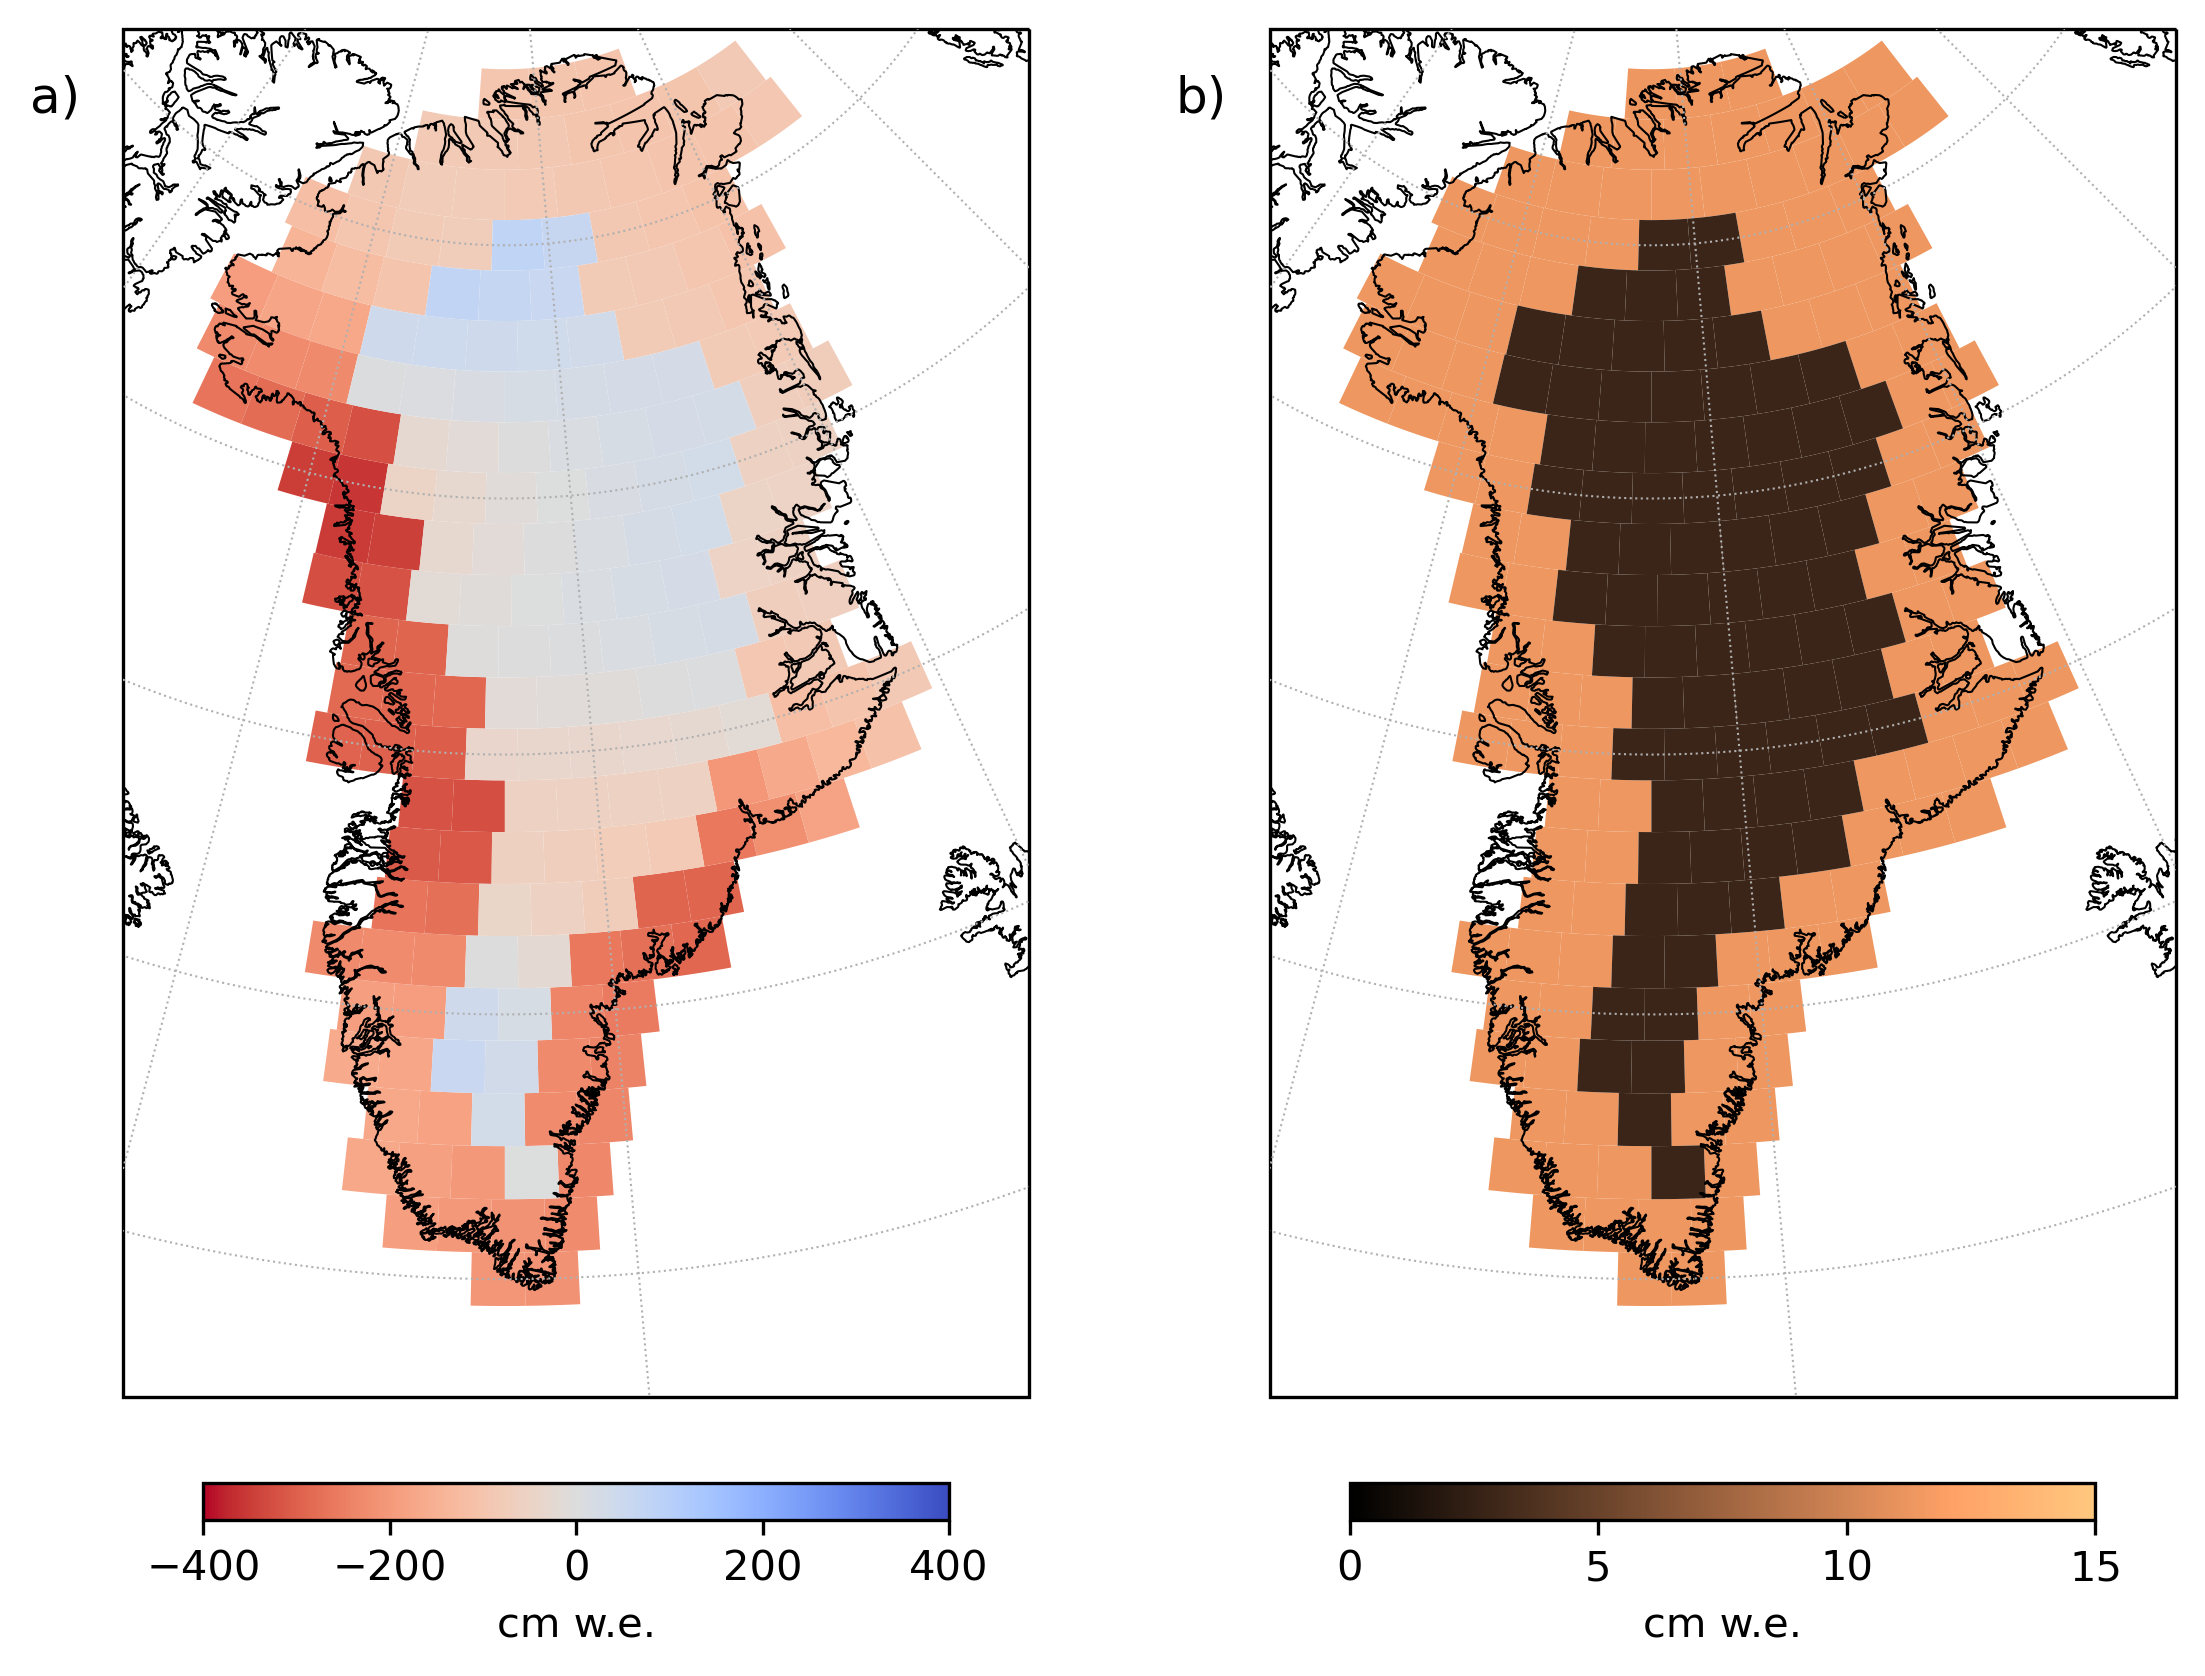

In [3]:
# dM residuals
# Compute mascon means
gsfc = utils.load_gscf_mascons()

start_date = '2007-01-01' # 'YYYY-MM-DD'
end_date = '2016-01-01' # 'YYYY-MM-DD'
gsfc_cmwe_delta = mascons.calc_mascon_delta_cmwe(gsfc, start_date, end_date)

# Select only GIS mascons
I_ = gsfc.locations == 1
gsfc_cmwe_delta = gsfc_cmwe_delta[I_]
lat_centers = gsfc.lat_centers[I_]
lon_centers = gsfc.lon_centers[I_]
min_lons = gsfc.min_lons[I_]
max_lons = gsfc.max_lons[I_]
min_lats = gsfc.min_lats[I_]
max_lats = gsfc.max_lats[I_]

vmin = -400
vmax = +400


import cartopy.crs as ccrs
polar_stereographic = ccrs.Stereographic(
    central_latitude=90.0,
    central_longitude=-45.0,
    false_easting=0.0,
    false_northing=0.0,
    true_scale_latitude=70.0,
    globe=ccrs.Globe('WGS84')
)

# Plot
fig = plt.figure(figsize=(8, 6), dpi=300)

ax = fig.add_subplot(1,2,1, projection=polar_stereographic)

sc = utils.plot_GSFCmascons(lon_centers, lat_centers, gsfc_cmwe_delta, min_lons, max_lons, min_lats, max_lats, ax=ax, vmin=vmin, vmax=vmax)

cb = fig.colorbar(sc, orientation='horizontal', shrink=0.65, pad=0.05)
cb.ax.set_xlabel('cm w.e.')

plt.text(-0.075, 0.95, 'a)', fontsize=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
    
# Uncertainties
# Explanation from Bryant Loomis: "For that I get errors of 4 cm w.e. yr-1 for the low elevation region and 1 cm w.e. yr-1 for the high elevation region (standard deviations are 7.0 and 4.8)."
# low = mascons 0-119; high = mascons 120-198
idx_lo = gsfc.labels[I_] <= 119
idx_hi = gsfc.labels[I_] >= 120
gsfc_cmwe_delta_sigma = gsfc_cmwe_delta
gsfc_cmwe_delta_sigma[idx_lo] = 4
gsfc_cmwe_delta_sigma[idx_hi] = 1

gsfc_cmwe_delta_sigma = np.sqrt(8)*gsfc_cmwe_delta_sigma

ax = fig.add_subplot(1,2,2, projection=polar_stereographic)
sc_err = utils.plot_GSFCmascons(lon_centers, lat_centers, gsfc_cmwe_delta_sigma, min_lons, max_lons, min_lats, max_lats, ax=ax, vmin=0, vmax=15, cmap='copper')

cb = fig.colorbar(sc_err, orientation='horizontal', shrink=0.65, pad=0.05)
cb.ax.set_xlabel('cm w.e.')

plt.text(-0.075, 0.95, 'b)', fontsize=12,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
    
# Save figure
plt.tight_layout()
plt.savefig('plots/GRACE_obs.png', bbox_inches='tight')
